In [56]:
import numpy as np # linear algebra
import pandas as pd # data processing, 
import os
import shutil
from scipy import stats # for Box-Cox Transformation
from mlxtend.preprocessing import minmax_scaling # for min_max scaling

import matplotlib.pyplot as plt # data visualization
import seaborn as sns # Statistical library for data visualization

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,log_loss
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [40]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
def checkEmptyData(df):
    missing_data=df.isnull()
    for column in missing_data.columns.values.tolist():
        print(column)
        print(missing_data[column].value_counts(),missing_data[column].dtype)
    return 0

In [41]:
def dataCleansing(df):
    print(df.columns)
    for column in df.columns:
        if(df[column].dtype=='int64' or df[column].dtype=='float64'):
            mean_column=df[column].mean()
            df[column].replace(np.nan,mean_column,inplace=True)
        elif(df[column].dtype=='object'):
            frequent=df1[column].value_counts().idxmax()
            df[column].replace(np.nan,frequent,inplace=True)
    return df

In [42]:
def dummyFunc(df,list1):
    for column in df.columns:
        if(column in list1):
            dummy=pd.get_dummies(df[column],prefix=column)
            df=pd.concat([df,dummy],axis=1)
            df.drop(column,inplace=True,axis=1)
    return df

In [43]:
def dataFrameManu(df,list1):
    #print("data frame columns and typres")
    #print(df.columns,df.dtypes)
    #print("description about the data frame")
    #print(df.describe(include="all"))
    checkEmptyData(df)
    df_cleansing=dataCleansing(df)
    df_dummy=dummyFunc(df_cleansing,list1)
    return df_dummy

In [44]:
df1=pd.read_csv("../input/titanic/train.csv")
survive_gender=df1[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values('Survived',ascending=False)
print(survive_gender)

      Sex  Survived
0  female  0.742038
1    male  0.188908


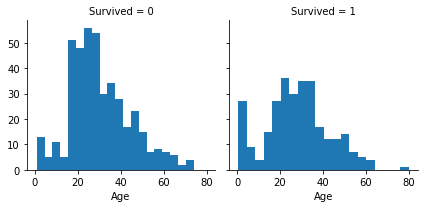

In [45]:
p=sns.FacetGrid(df1,col='Survived')
p.map(plt.hist,'Age',bins=20)

In [46]:
if __name__=="__main__":
    df1=pd.read_csv("../input/titanic/train.csv")
    df2=pd.read_csv("../input/titanic/test.csv")
    list1=['Pclass','Sex','Embarked']
    #print("processing training set")
    df1_new=dataFrameManu(df1,list1)
    print("Traning set after data preprocessing",df1_new)
   
    df1_new['Family']=df1_new['SibSp']+df1_new['Parch']+1
    df1_new=df1_new.drop(['SibSp','Parch'],axis=1)
   
    # print("processing test set")
    df2_new=dataFrameManu(df2,list1)
    print("Test set after data preprocessing",df2_new)
    df2_new['Family']=df2_new['SibSp']+df2_new['Parch']+1
    df2_new=df2_new.drop(['SibSp','Parch'],axis=1)
    
    #shutil.rmtree('outputset',ignore_errors=False) #to delete diectory with it contents
    if not os.path.exists('outputset'):
        os.makedirs('outputset')
        df1_new.to_csv('outputset/Trainset.csv',index=False)
        df2_new.to_csv('outputset/Testset.csv',index=False)
    
    
    
    #print("new data frame")
    os.listdir('/kaggle/')
   
# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

PassengerId
False    891
Name: PassengerId, dtype: int64 bool
Survived
False    891
Name: Survived, dtype: int64 bool
Pclass
False    891
Name: Pclass, dtype: int64 bool
Name
False    891
Name: Name, dtype: int64 bool
Sex
False    891
Name: Sex, dtype: int64 bool
Age
False    714
True     177
Name: Age, dtype: int64 bool
SibSp
False    891
Name: SibSp, dtype: int64 bool
Parch
False    891
Name: Parch, dtype: int64 bool
Ticket
False    891
Name: Ticket, dtype: int64 bool
Fare
False    891
Name: Fare, dtype: int64 bool
Cabin
True     687
False    204
Name: Cabin, dtype: int64 bool
Embarked
False    889
True       2
Name: Embarked, dtype: int64 bool
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Traning set after data preprocessing      PassengerId  Survived                                               Name  \
0              1         0                            Braund, Mr. Owen Har

/opt/conda/lib/python3.7/site-packages/mlxtend/preprocessing/scaling.py:40: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ary_new = ary_new[:, np.newaxis]


Text(0.5, 1.0, 'Scaled data')

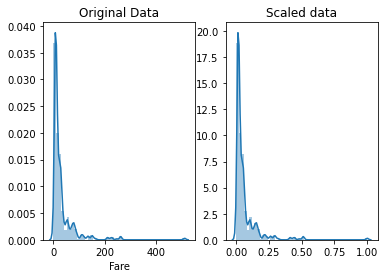

In [47]:

df1_new=pd.read_csv('/kaggle/working/outputset/Trainset.csv')
df2_new=pd.read_csv('/kaggle/working/outputset/Testset.csv')
fare=df1_new["Fare"]
# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(fare, columns = [0])

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(fare, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")

In [119]:
y=df1_new['Survived']
x=df1_new.drop(['Survived','Name','PassengerId','Cabin','Ticket'],axis=1)
#x_test=df2_new.drop(['Name','PassengerId','Cabin','Ticket'],axis=1)

In [120]:
y.shape

(891,)

In [139]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [140]:
logistic=LogisticRegression()
logistic.fit(x_train,y_train)
y_pred=logistic.predict(x_test)
logistic_acc=round(logistic.score(x_train,y_train)*100,2)
print('accuracy',logistic_acc)

accuracy 80.06


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [142]:
classifier=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)
y_pred_forest=classifier.predict(x_test)
classifier.score(x_train,y_train)
RForest_acc=round(classifier.score(x_train,y_train)*100,2)
print('accuracy',RForest_acc)

accuracy 98.17


In [134]:
boost_classifier=AdaBoostClassifier(n_estimators = 100, random_state = 0)
boost_classifier.fit(x_train,y_train)
y_pred_boost=boost_classifier.predict(x_test)
AdaBoost_acc=round(boost_classifier.score(x_train,y_train)*100,2)
print('accuracy',AdaBoost_acc)

accuracy 85.55


In [135]:
boosting_classifier=GradientBoostingClassifier(n_estimators = 100)
boosting_classifier.fit(x_train,y_train)
y_pred_boosting=boosting_classifier.predict(x_test)
GBoosting_acc=round(boosting_classifier.score(x_train,y_train)*100,2)
print('accuracy',GBoosting_acc)

accuracy 91.33


In [136]:
SVMachine=SVC()
SVMachine.fit(x_train,y_train)
y_pred_SV=SVMachine.predict(x_test)
SVM_acc=round(SVMachine.score(x_train,y_train)*100,2)
print('accurancy',SVM_acc)

accurancy 66.93


In [137]:
evaluation={'model':['Logistic','RandomForest','AdaBoost','GradientBoosting','SVM'],'Accuracy':[logistic_acc,RForest_acc,AdaBoost_acc,GBoosting_acc,SVM_acc]}
model=pd.DataFrame(evaluation)
model.sort_values('Accuracy',ascending=False)

,model,Accuracy
1,RandomForest,97.91
3,GradientBoosting,91.33
2,AdaBoost,85.55
0,Logistic,80.58
4,SVM,66.93


In [92]:
submission=pd.DataFrame({'PassengerId':df2_new['PassengerId'],'Survived':y_pred_forest})

In [93]:
submission.to_csv('submission.csv',index=False)

In [95]:
submission3=pd.DataFrame({'PassengerId':df2_new['PassengerId'],'Survived':y_pred_boost})
submission3.to_csv('submission3.csv',index=False)